In [ ]:
# Option 1 - Decision Tree
# We have decided to train and build a model to analyze the heart disease data set with the Decision Tree

In [3]:
# 1. Use gini measure quality of split and build the decision tree. Record the model accuracy.

In [13]:
# Import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
heart_disease_dataset = pd.read_csv("./heart-disease-dataset2.csv")
heart_disease_dataset = heart_disease_dataset.replace('?','0')
print("These are the number of null values in each column: ")
heart_disease_dataset.isnull().sum()

These are the number of null values in each column: 


age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
result     0
dtype: int64

In [17]:
# We can group our columns into input and output variables, with input columns falling under X and the output column falling under Y
# axis=1 means that the operation should be done column-wise
Input_X = heart_disease_dataset.drop('result',axis=1)
Output_Y = heart_disease_dataset['result']

# Import a necessary module
from sklearn.model_selection import train_test_split
# Do an 80% training set and 20% testing set split
X_Training_Set, X_Testing_Set, Y_Training_Set, Y_Testing_Set = train_test_split(Input_X, Output_Y, test_size = 0.2, random_state=5)
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='gini')
dt_classifier.fit(X_Training_Set, Y_Training_Set)
Y_Prediction = dt_classifier.predict(X_Testing_Set)
from sklearn.metrics import accuracy_score
gini_accuracy = accuracy_score(Y_Testing_Set, Y_Prediction)
print("Our accuracy score for our model is as follows: " + str(gini_accuracy))
gini_accuracy_percentage = gini_accuracy * 100
print(f"The model is {gini_accuracy_percentage:.1f}% accurate.")

Our accuracy score for our model is as follows: 0.5245901639344263
The model is 52.5% accurate.


In [8]:
# 2. Visualize the decision tree built in Question-1

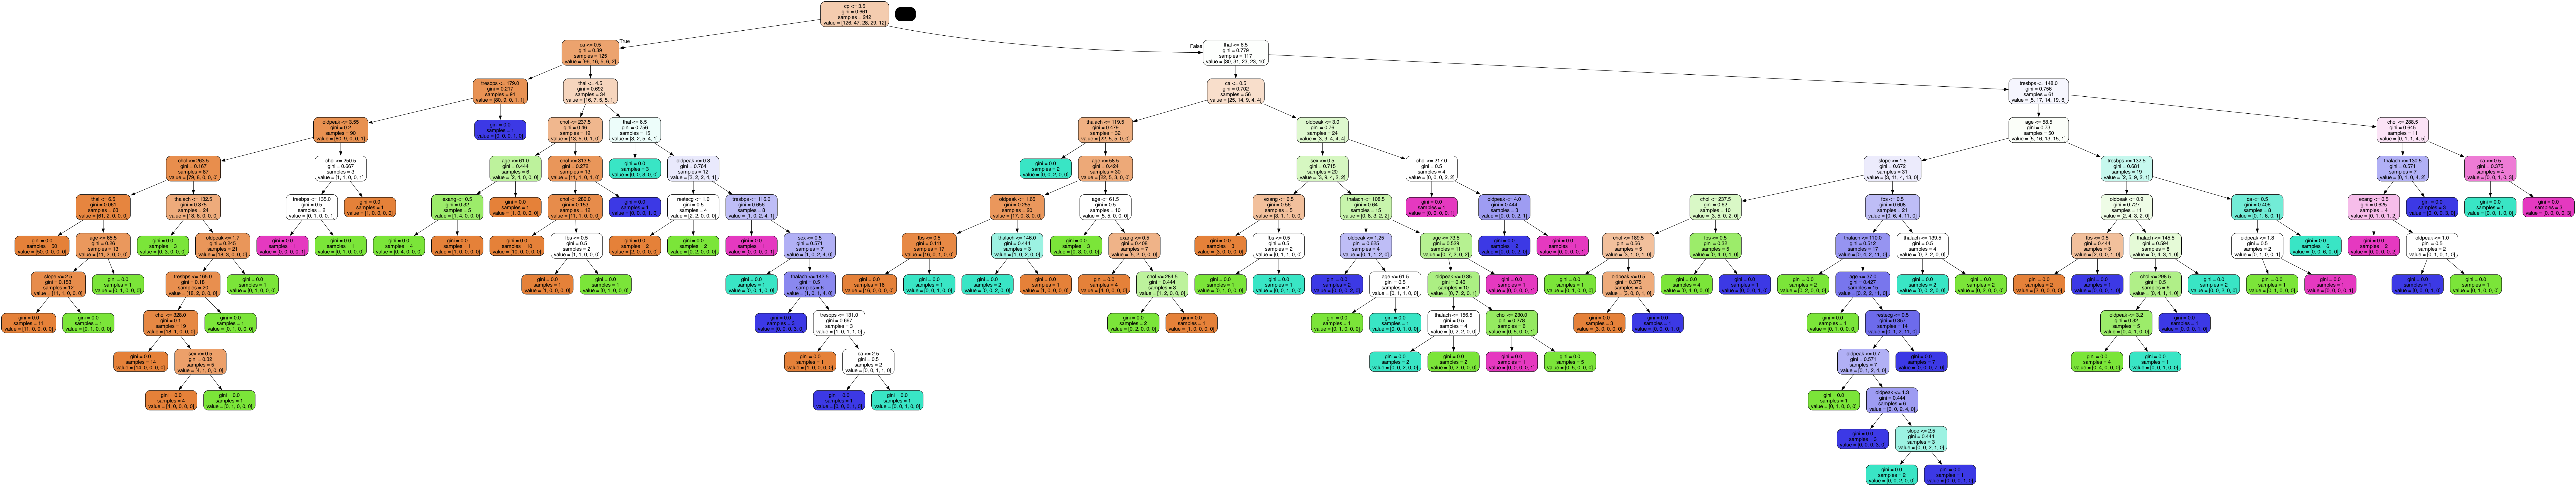

In [40]:
# Import necessary modules
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
decision_tree_model_data = export_graphviz(dt_classifier, out_file=None, feature_names=list(X_Training_Set.columns.values), rounded=True, filled=True)

decision_tree_graph = pydotplus.graph_from_dot_data(decision_tree_model_data)

# Prints the decision_tree_graph object to the console
print(decision_tree_graph)

# Display the graph that has been created
Image(decision_tree_graph.create_png())

In [ ]:
# 3. Change max_depth=3 and rebuild the decision tree. Record the model accuracy.

In [36]:
# Create a decision tree classifier
dt_classifier_max_depth_3 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_classifier_max_depth_3.fit(X_Training_Set, Y_Training_Set)
Y_Prediction = dt_classifier_max_depth_3.predict(X_Testing_Set)
gini_accuracy_max_depth_3 = accuracy_score(Y_Testing_Set, Y_Prediction)

# print out our accuracy score
print("Our accuracy score for our model is as follows: " + str(gini_accuracy_max_depth_3))
gini_accuracy_percentage_max_depth_3 = gini_accuracy_max_depth_3 * 100
print(f"The model is {gini_accuracy_percentage_max_depth_3:.1f}% accurate.")

Our accuracy score for our model is as follows: 0.6229508196721312
The model is 62.3% accurate.


In [ ]:
# 4. Visualize the decision tree built in Question-3

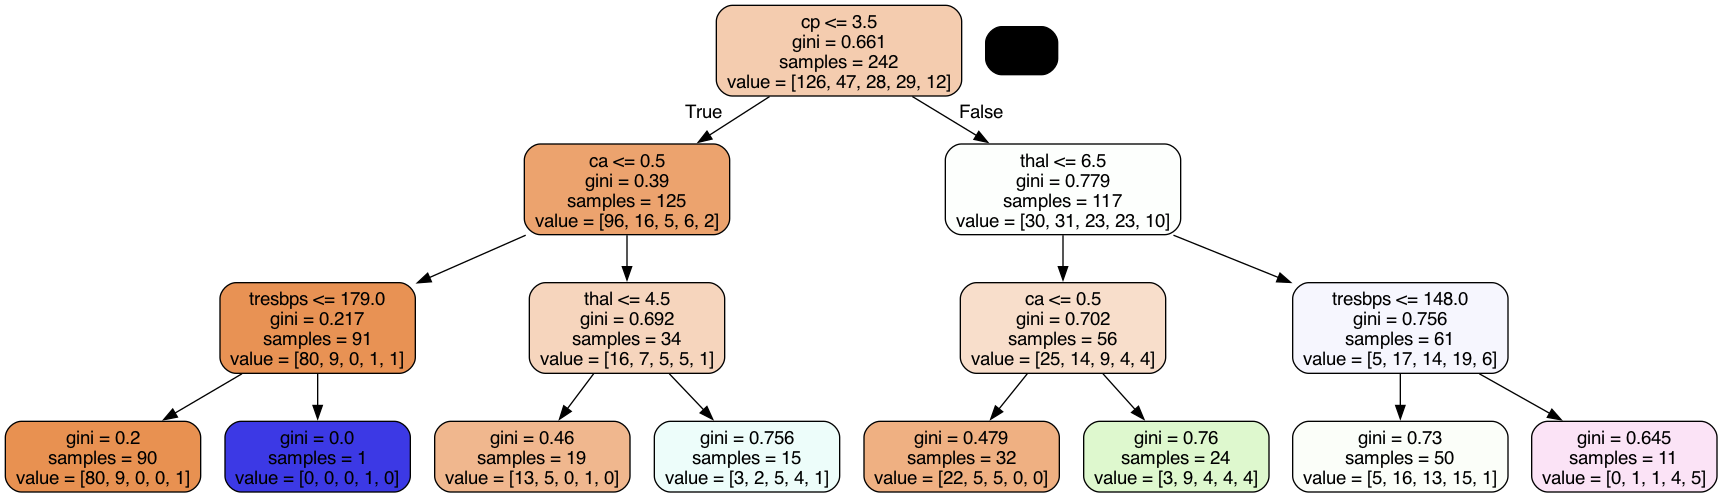

In [28]:
decision_tree_model_data_max_depth_3 = export_graphviz(dt_classifier_max_depth_3, out_file=None, feature_names=list(X_Training_Set.columns.values), rounded=True, filled=True)
decision_tree_graph_max_depth_3 = pydotplus.graph_from_dot_data(decision_tree_model_data_max_depth_3)
print(decision_tree_graph_max_depth_3)
Image(decision_tree_graph_max_depth_3.create_png())

In [ ]:
# 5. Use entropy measure quality of split and build the decision tree. Record the model accuracy.

In [32]:

dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_classifier_entropy.fit(X_Training_Set, Y_Training_Set)
Y_Prediction_entropy = dt_classifier_entropy.predict(X_Testing_Set)
gini_accuracy_entropy = accuracy_score(Y_Testing_Set, Y_Prediction_entropy)
print("Our accuracy score for our model is as follows: " + str(gini_accuracy_entropy))
gini_accuracy_percentage_entropy = gini_accuracy_entropy * 100

# Print the final statement
print(f"The model is {gini_accuracy_percentage_entropy:.1f}% accurate.")

Our accuracy score for our model is as follows: 0.6721311475409836
The model is 67.2% accurate.


In [ ]:
# 6. Visualize the decision tree built in Question-5

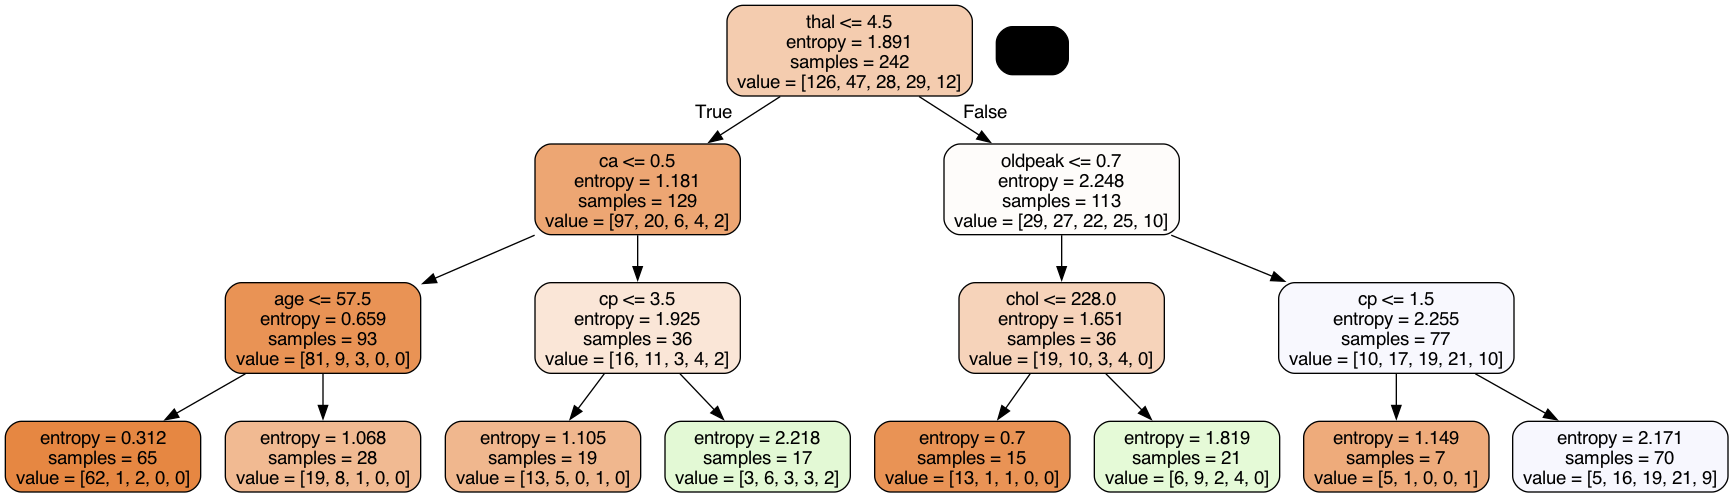

In [42]:
# filled=True fills the nodes with color
decision_tree_model_entropy = export_graphviz(dt_classifier_entropy, out_file=None, feature_names=list(X_Training_Set.columns.values), rounded=True, filled=True)
decision_tree_graph_entropy = pydotplus.graph_from_dot_data(decision_tree_model_entropy)
print(decision_tree_graph_entropy)
Image(decision_tree_graph_entropy.create_png())

In [ ]:
# 7. Compare all three decision trees using their accuracy

In [1]:
print("Decision tree algorithms use specific functions to measure the quality of a split at each node,")
print("helping determine the best feature to divide the data at each step.")

print("\nIn this case, the criteria used were:")
print("- Gini (without a specified tree depth)")
print("- Gini (with a tree depth of 3)")
print("- Entropy (with a tree depth of 3)\n")

print("Results:")
print(f"- Gini (no specified depth): Accuracy = 52.5% (least accurate)")
print(f"- Gini (depth = 3): Accuracy = 62.3%")
print(f"- Entropy (depth = 3): Accuracy = 67.2% (most accurate)")

Decision tree algorithms use specific functions to measure the quality of a split at each node,
helping determine the best feature to divide the data at each step.

In this case, the criteria used were:
- Gini (without a specified tree depth)
- Gini (with a tree depth of 3)
- Entropy (with a tree depth of 3)

Results:
- Gini (no specified depth): Accuracy = 52.5% (least accurate)
- Gini (depth = 3): Accuracy = 62.3%
- Entropy (depth = 3): Accuracy = 67.2% (most accurate)
